In [2]:
from pymc import DiscreteUniform, Exponential, deterministic, Poisson, Uniform
import numpy as np
import pandas as pd

In [19]:
df = pd.read_csv('BRCA-mini.txt.gz', sep = '\t', index_col = 0)

,TCGA-3C-AAAU-01A-11R-A41B-07,TCGA-3C-AALI-01A-11R-A41B-07,TCGA-3C-AALJ-01A-31R-A41B-07,TCGA-3C-AALK-01A-11R-A41B-07,TCGA-4H-AAAK-01A-12R-A41B-07,TCGA-5L-AAT0-01A-12R-A41B-07,TCGA-5L-AAT1-01A-12R-A41B-07,TCGA-5T-A9QA-01A-11R-A41B-07,TCGA-A1-A0SB-01A-11R-A144-07,TCGA-A1-A0SD-01A-11R-A115-07,...,TCGA-UL-AAZ6-01A-11R-A41B-07,TCGA-UU-A93S-01A-21R-A41B-07,TCGA-V7-A7HQ-01A-11R-A33J-07,TCGA-W8-A86G-01A-21R-A36F-07,TCGA-WT-AB41-01A-11R-A41B-07,TCGA-WT-AB44-01A-11R-A41B-07,TCGA-XX-A899-01A-11R-A36F-07,TCGA-XX-A89A-01A-11R-A36F-07,TCGA-Z7-A8R5-01A-42R-A41B-07,TCGA-Z7-A8R6-01A-11R-A41B-07
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,488.057611,552.033915,447.255663,466.387411,407.025686,452.067973,519.907296,420.190964,713.724010,604.920890,...,565.945015,397.21780,667.886074,556.262515,510.670840,373.600694,602.192664,518.030524,754.717544,405.115266
std,1134.685047,1395.622359,1142.833659,1312.708380,1175.597828,1457.528485,1799.459067,1137.738733,3549.859561,2681.837925,...,1503.439330,941.53761,1527.344039,2093.676680,1318.728480,773.184464,2302.707858,1946.646044,4121.950324,982.772963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258525,1.087500,0.000000,0.000000,0.425500,0.000000,0.000000,0.000000,0.450500,0.330800,...,0.399200,0.00000,0.000000,0.474600,0.000000,0.000000,0.393700,1.299000,0.000000,0.000000
50%,26.883400,38.879800,22.212150,55.647500,36.595700,34.022600,46.454750,7.060700,14.866550,40.691400,...,13.174350,5.05065,20.938450,49.316550,27.602500,31.765400,49.803150,49.834650,33.449800,24.394950
75%,521.210300,428.873025,427.354925,472.796875,393.616975,391.406350,344.743275,343.619200,430.228625,383.260250,...,520.686725,332.83285,426.467500,546.274325,329.061475,478.314000,533.563025,501.036850,439.157225,506.829075
max,5798.374600,7649.265900,8840.398900,10960.219300,9585.442600,12331.321300,15406.625900,8591.527200,31626.949000,23793.492700,...,11247.312700,6162.08390,8309.495300,18324.992900,9580.970000,5409.309700,20348.755900,17094.837000,36838.521000,7339.170100


In [21]:
dft = df.transpose()

In [22]:
dft.describe()

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ABCA7|10347,ABCA8|10351,ABCA9|10350,ABCB10|23456,ABCB11|8647,ABCB1|5243,ABCB4|5244,ABCB5|340273,ABCB6|10058,ABCB7|22
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.011270,8.672673,7.692180,113.678198,1055.660298,0,231.269466,0.527209,0.126342,0.023255,...,353.440038,339.705532,195.244591,553.013080,2.914789,122.060261,31.159316,18.195640,566.989131,462.805156
std,0.098819,7.671787,5.856019,59.123857,458.994476,0,186.897908,0.635008,2.009087,0.532082,...,233.746594,872.246065,462.586545,221.816769,12.785855,149.948674,31.280600,47.826391,363.071405,133.448431
min,0.000000,0.000000,0.000000,28.934500,345.121200,0,18.731400,0.000000,0.000000,0.000000,...,25.736300,0.000000,0.000000,116.925100,0.000000,0.000000,0.000000,0.000000,19.929600,128.466700
25%,0.000000,3.328150,3.836375,79.870800,763.931800,0,114.020800,0.000000,0.000000,0.000000,...,195.092725,14.911125,18.828725,397.844100,0.000000,29.095300,14.946150,0.770500,346.657700,378.150700
50%,0.000000,7.125350,6.184600,101.453750,955.281300,0,177.014100,0.356200,0.000000,0.000000,...,294.362700,67.243150,53.808850,507.313250,0.588850,65.463950,25.411400,2.942000,490.764450,457.383700
75%,0.000000,12.209350,9.940350,131.429600,1222.835925,0,279.122575,0.790975,0.000000,0.000000,...,456.394200,257.938975,154.936975,674.998125,1.825800,152.804550,38.946625,10.544500,675.589425,541.881650
max,2.020300,91.827500,40.253600,1119.193200,5009.514700,0,1658.175400,4.762500,58.738000,15.767600,...,2242.774600,7999.566300,5814.008000,1778.484300,233.112600,1069.745500,494.277500,475.099200,3800.202600,1097.452700


In [45]:
sample_row = 'ABCB6|10058'
sample_row_2 = 'ABCB5|340273'

import seaborn as sns
from matplotlib import pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

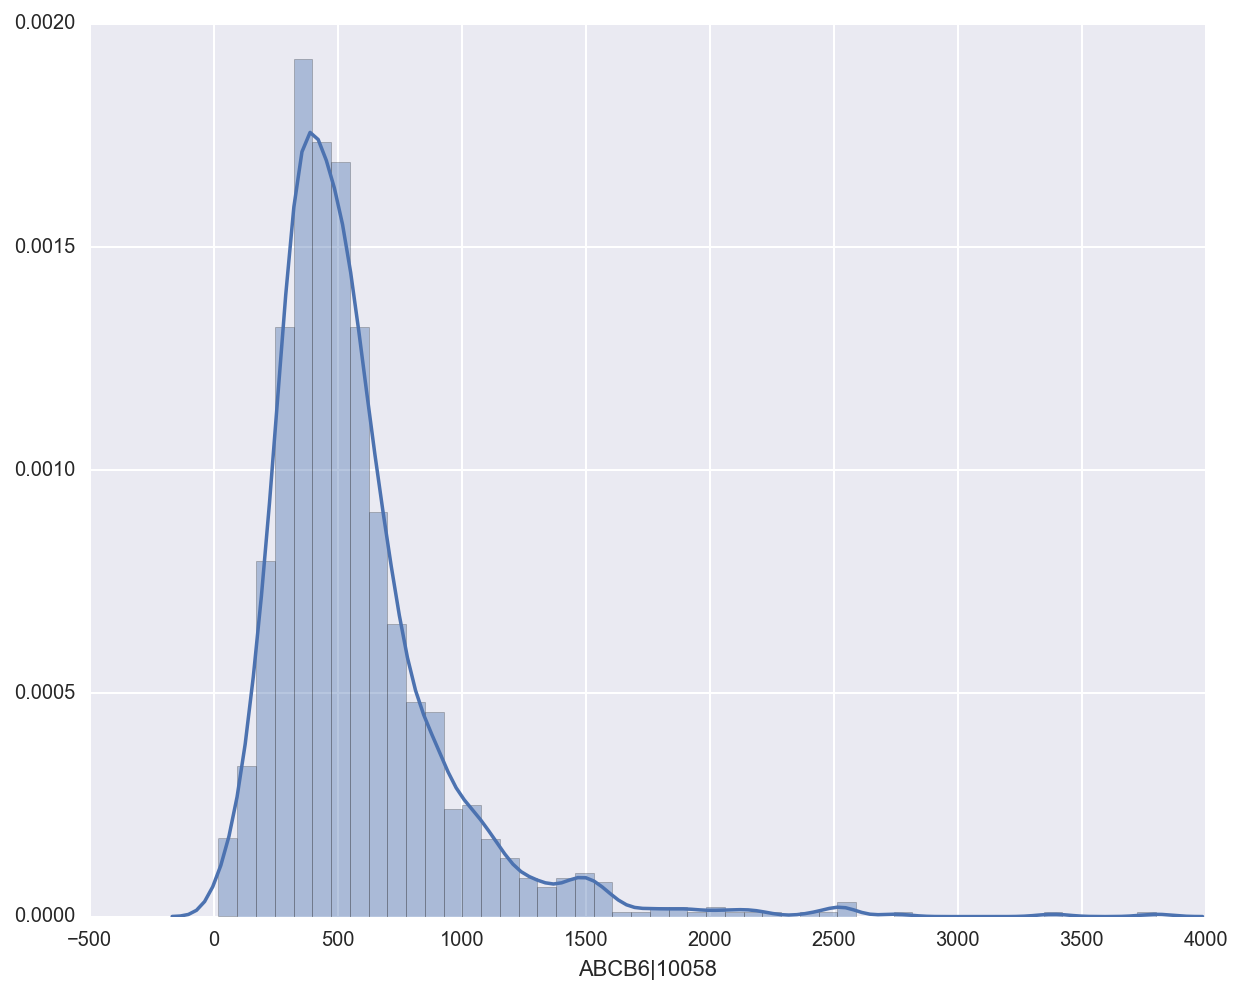

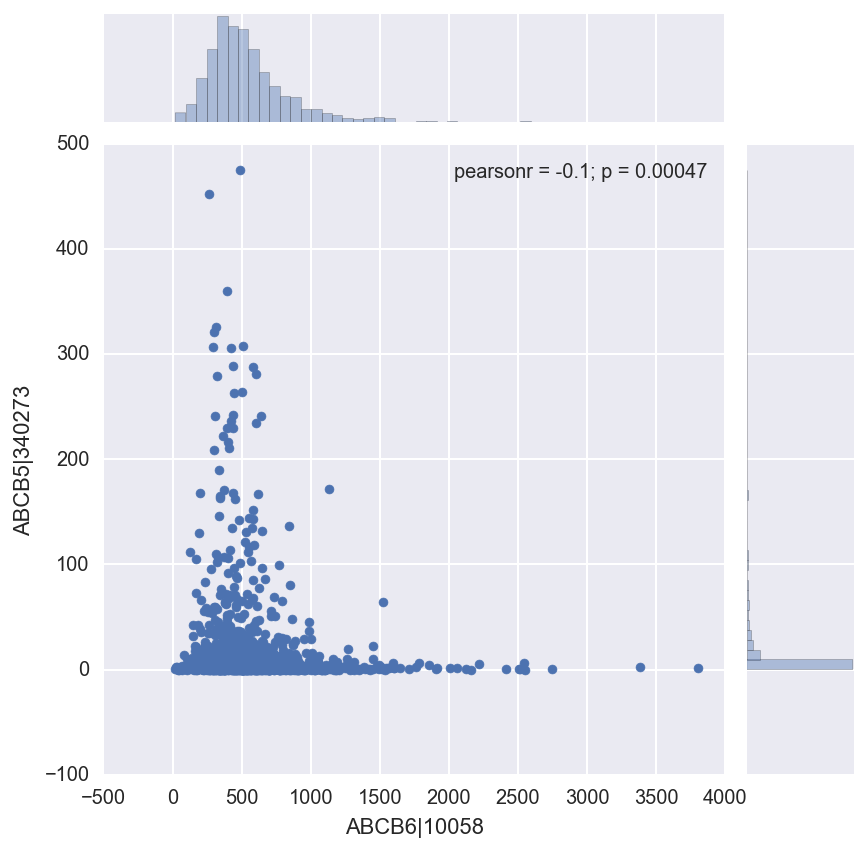

In [50]:
plt.figure(figsize=(10, 8))

sns.distplot(dft[sample_row])
sns.jointplot(x = sample_row, y = sample_row_2, data = dft[[sample_row, sample_row_2]])